<a href="https://colab.research.google.com/github/bhavanamythrim/WEATHER_FORECAST/blob/main/D3_ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [25]:
csv_path = "/content/weatherHistory.csv"

In [26]:
df = pd.read_csv("/content/weatherHistory.csv")
print("Preview of dataset:")
print(df.head())

Preview of dataset:
                  Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0    

In [27]:
print(df.columns)

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')


In [37]:
X = df[['Temperature (C)', 'Apparent Temperature (C)', 'Wind Speed (km/h)', 'Visibility (km)', 'Pressure (millibars)']]
y = df['Humidity']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nTrain samples:", X_train.shape, "Test samples:", X_test.shape)


Train samples: (19606, 5) Test samples: (4902, 5)


In [40]:
model = LinearRegression()

nan_rows_in_X_train = X_train.isnull().any(axis=1)

X_train_cleaned = X_train[~nan_rows_in_X_train]
y_train_cleaned = y_train[~nan_rows_in_X_train]

model.fit(X_train_cleaned, y_train_cleaned)
print("\nModel trained after handling NaNs.")


Model trained after handling NaNs.


In [41]:
y_pred = model.predict(X_test)

In [42]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("\nMetrics on test set:")
print(f"MAE  = {mae:.4f}")
print(f"MSE  = {mse:.4f}")
print(f"RMSE = {rmse:.4f}")
print(f"R2   = {r2:.4f}")


Metrics on test set:
MAE  = 0.1100
MSE  = 0.0187
RMSE = 0.1368
R2   = 0.4754


In [43]:
comp = pd.DataFrame({'Actual': y_test.values, 'Predicted': np.round(y_pred, 3)})
print("\nSample comparison:")
print(comp.head(6))


Sample comparison:
   Actual  Predicted
0    0.72      0.683
1    0.63      0.759
2    0.84      0.687
3    0.88      0.890
4    0.44      0.518
5    0.96      1.027


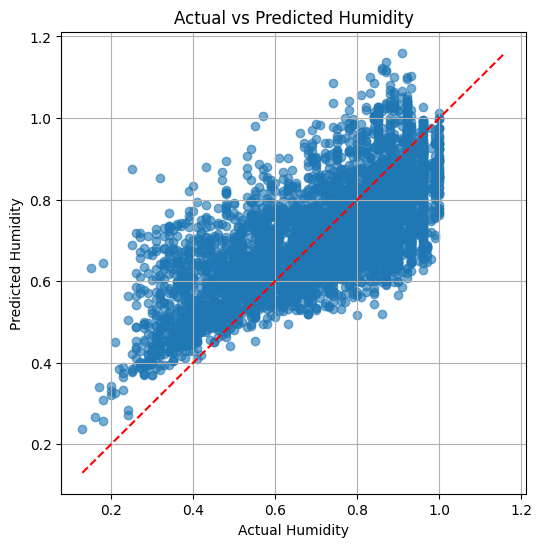

In [44]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
mn = min(y_test.min(), y_pred.min())
mx = max(y_test.max(), y_pred.max())
plt.plot([mn,mx],[mn,mx], 'r--')
plt.xlabel('Actual Humidity')
plt.ylabel('Predicted Humidity')
plt.title('Actual vs Predicted Humidity')
plt.grid(True)
plt.show()

In [46]:
new_row = pd.DataFrame({
    'Temperature (C)': [25.0],
    'Apparent Temperature (C)': [20.0],
    'Wind Speed (km/h)': [10.0],
    'Visibility (km)': [10.0],
    'Pressure (millibars)': [1015.0]
})
pred_new = model.predict(new_row)
print("\nPredicted Humidity for", new_row.to_dict(orient='records')[0], "->", round(pred_new[0],4))


Predicted Humidity for {'Temperature (C)': 25.0, 'Apparent Temperature (C)': 20.0, 'Wind Speed (km/h)': 10.0, 'Visibility (km)': 10.0, 'Pressure (millibars)': 1015.0} -> 0.4617


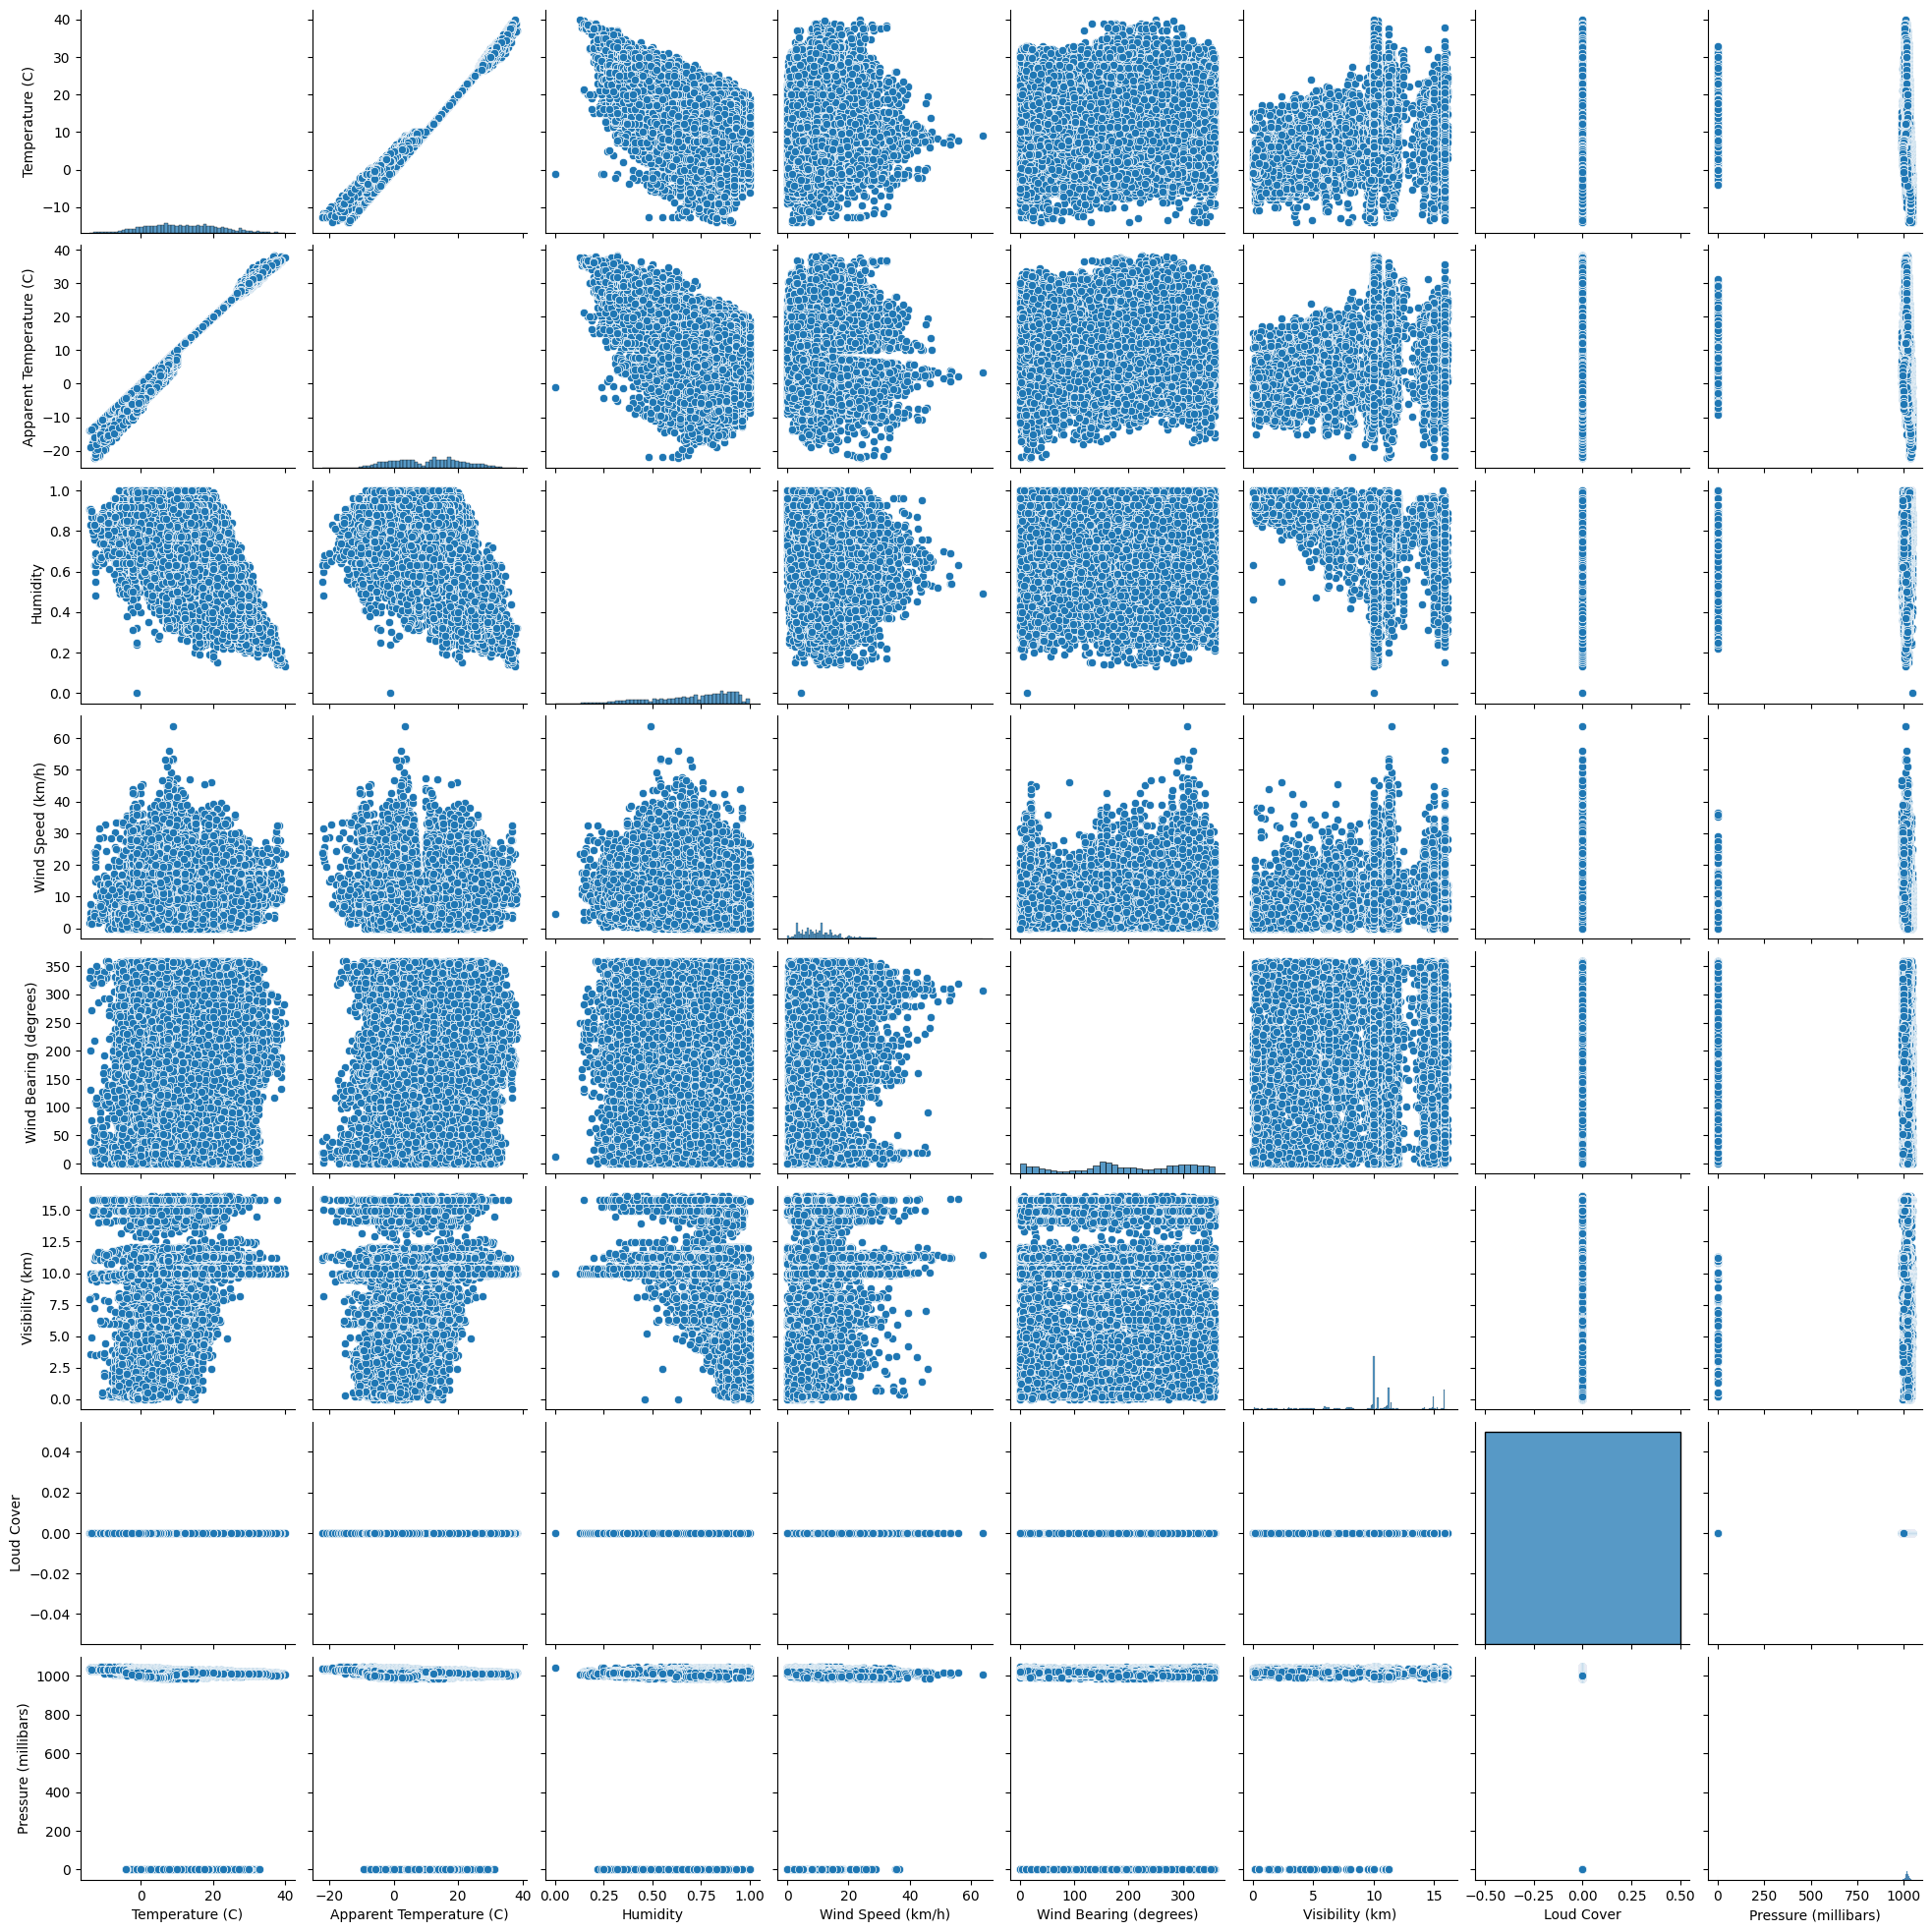

In [47]:
sns.pairplot(df)
plt.show()

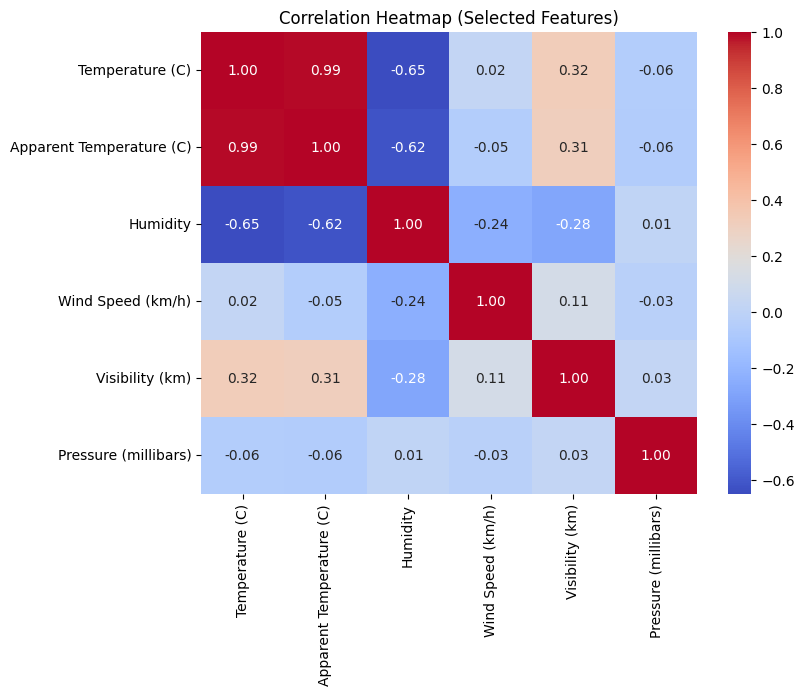

In [49]:
selected_cols = ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Visibility (km)', 'Pressure (millibars)']
heatmap_df = df[selected_cols]
plt.figure(figsize=(8,6))
sns.heatmap(heatmap_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Selected Features)")
plt.show()


Error Comparison Table:
  Metric     Value
0    MAE  0.109978
1    MSE  0.018706
2   RMSE  0.136771
3     R2  0.475444


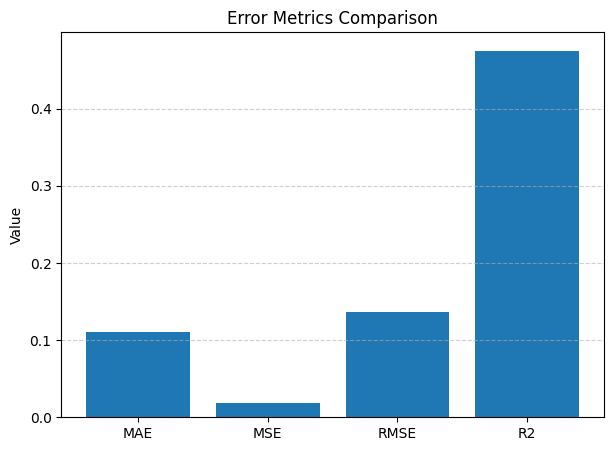

In [50]:

errors = {
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse,
    'R2': r2
}
error_df = pd.DataFrame(list(errors.items()), columns=['Metric', 'Value'])
print("\nError Comparison Table:")
print(error_df)
plt.figure(figsize=(7,5))
plt.bar(error_df['Metric'], error_df['Value'])
plt.title("Error Metrics Comparison")
plt.ylabel("Value")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()
